## 线性回归

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree = degree, include_bias = False)
    linear_regression = LinearRegression()
    # 先增加多项式，再用线性回归算法你拟合数据
    pipeline = Pipeline([('polinomial_features', polynomial_features),('linear_regression', linear_regression)])
    return pipeline

In [3]:
import numpy as np
n_dots = 200
X = np.linspace(-2*np.pi,2*np.pi,n_dots)
Y = np.sin(X)+0.2*np.random.rand(n_dots)-0.1
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.metrics import mean_squared_error
degrees = [2,3,5,20]
results = []
for d in degrees:
    model = polynomial_model(degree = d)
    model.fit(X,Y)
    train_score = model.score(X,Y)
    mse = mean_squared_error(Y,model.predict(X))
    results.append({'model':model,'degree':d,'score':train_score, 'mse':mse})
for r in results:
    print('degree:{}; train_score:{};mean squared error:{}'.format(r['degree'],r['score'],r['mse']))

degree:2; train_score:0.14223710416514035;mean squared error:0.43315276179904266
degree:3; train_score:0.26271218446718414;mean squared error:0.3723153042519883
degree:5; train_score:0.8945470117991632;mean squared error:0.05325160752575655
degree:20; train_score:0.9833500017024513;mean squared error:0.008407909436923284


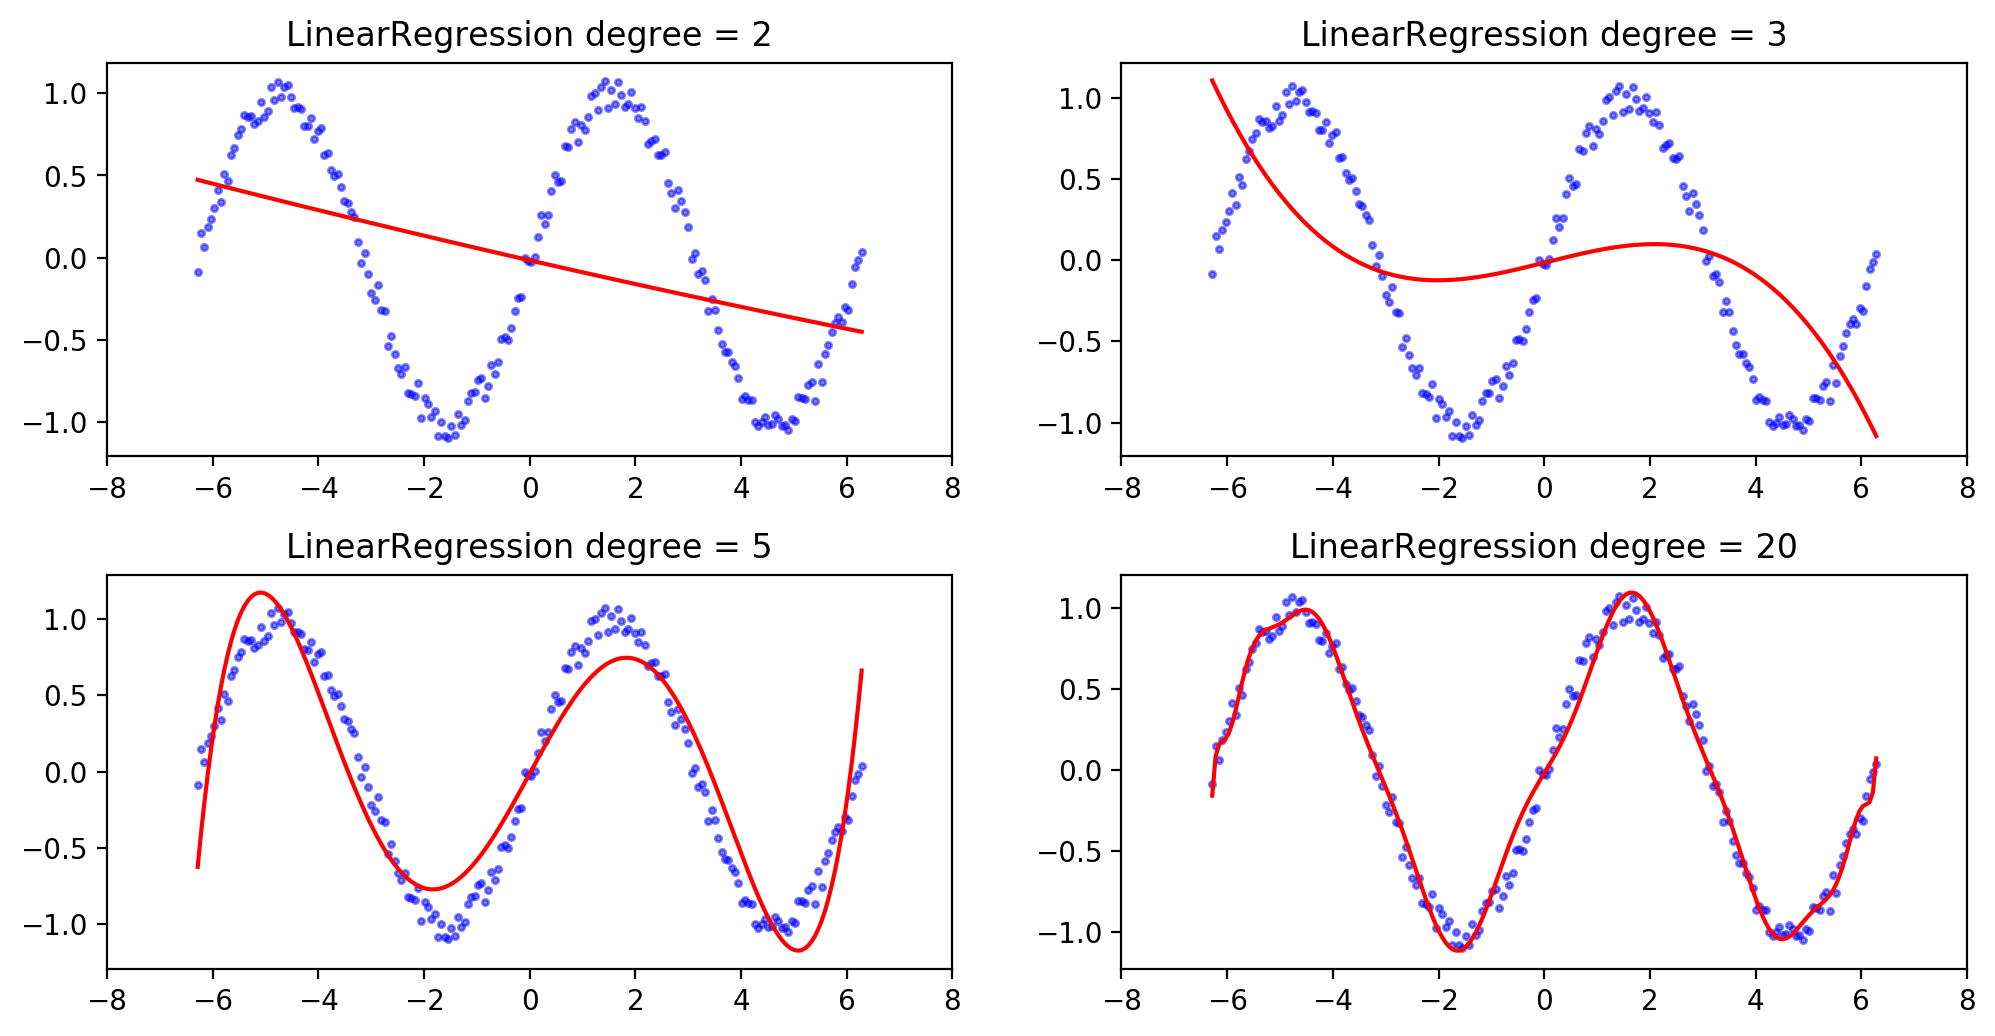

In [4]:
from matplotlib.figure import SubplotParams
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6), dpi=200, subplotpars = SubplotParams(hspace = 0.3))
for i,r in enumerate(results):
    fig = plt.subplot(2,2,i+1)
    plt.xlim(-8,8)
    plt.title('LinearRegression degree = {}'.format(r['degree']))
    plt.scatter(X,Y,s=5,c='b',alpha = 0.5)
    plt.plot(X,r['model'].predict(X),'r-')

In [1]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np
def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [6]:
polynomial_model(degrees[i])[-1]

LinearRegression()

<Figure size 3600x800 with 0 Axes>

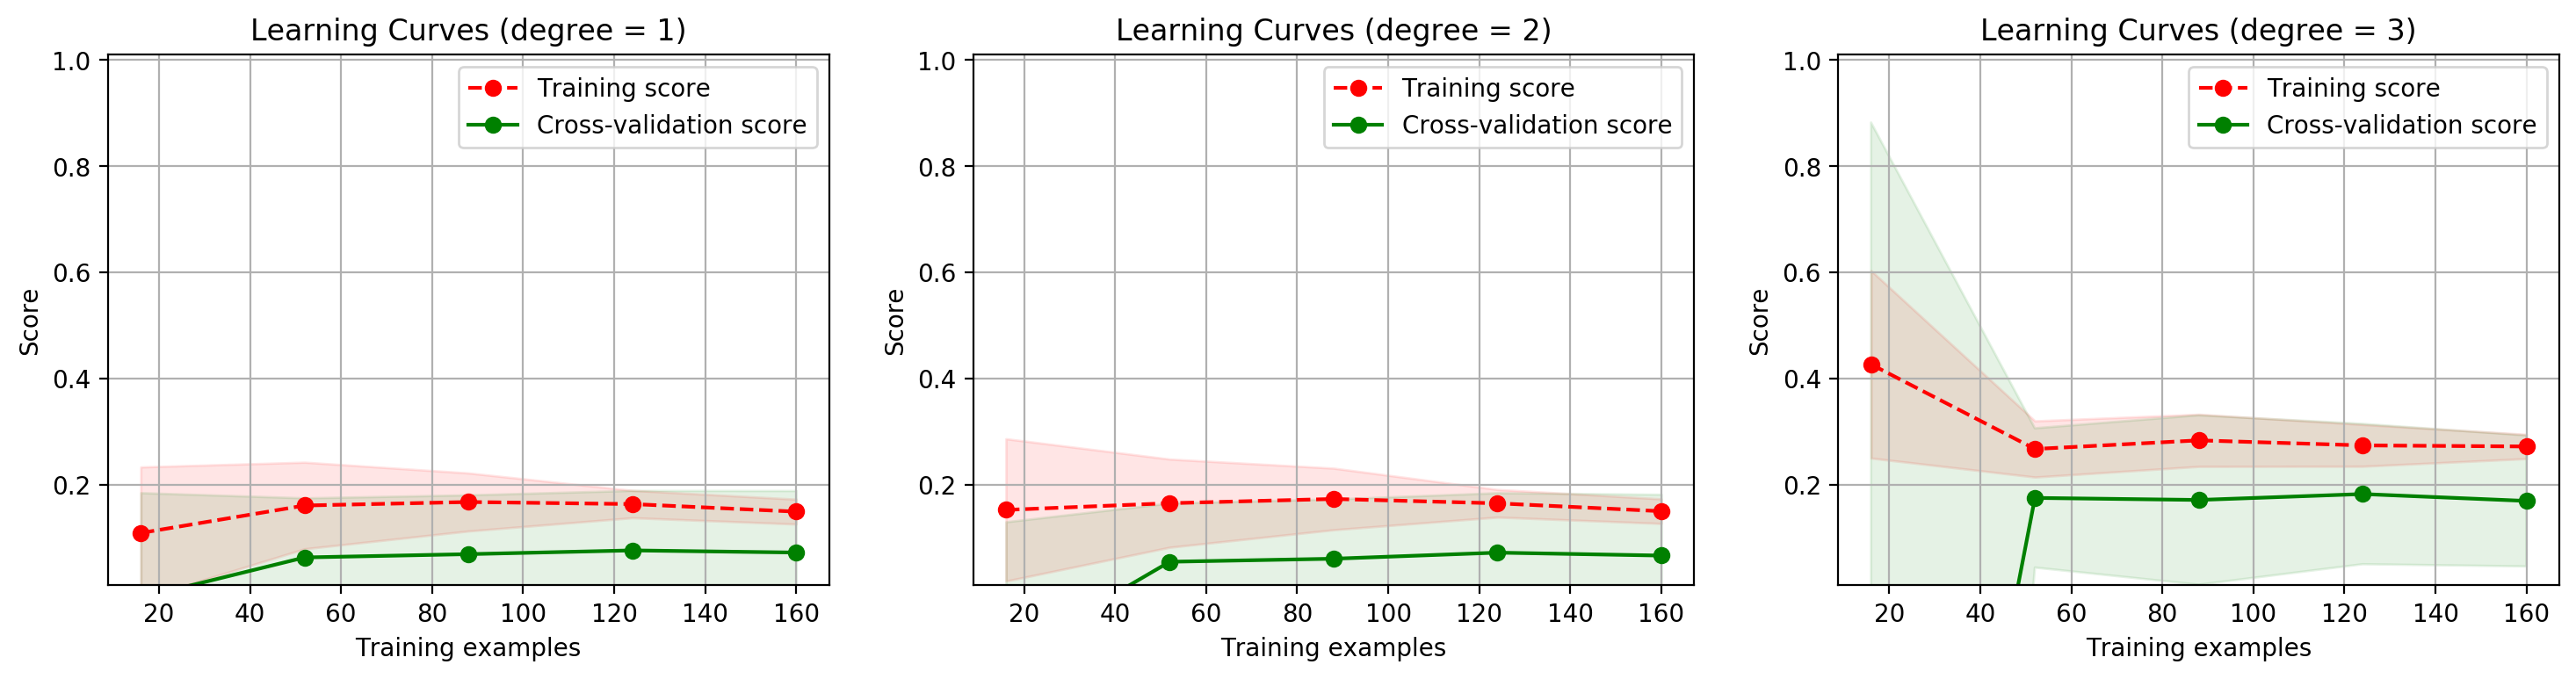

In [9]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
plt.figure(figsize = (18,4), dpi = 200)
title = 'Learning Curves (degree = {})'
degrees = [1,2,3]
plt.figure(figsize = (18,4), dpi = 200)
for i in range(len(degrees)):
    plt.subplot(1,3,i+1)
    plot_learning_curve(plt, polynomial_model(degrees[i]), title.format(degrees[i]), X, Y, ylim = (0.01,1.01), cv=cv)

#### 房价预测

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 3)

/home/weijunfei/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [ ]:
import time
from sklearn.linear_model import LinearRegression
model = LinearRegression()
start = time.time()
model.fit(X_train,y_train)
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test,y_test)
print('elaspe:{0:.6f};train_score{1:0.6f};cv_score:{2:.6f}'.format(time.time()-start, train_score, cv_score))

model = LinearRegression(normalize = True)
model = polynomial_model(degree = 2)
start = time.time()
model.fit(X_train,y_train)
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test,y_test)
print('elaspe:{0:.6f};train_score{1:0.6f};cv_score:{2:.6f}'.format(time.time()-start, train_score, cv_score))

In [19]:
model = LinearRegression(normalize = True)
model = polynomial_model(degree = 3)
start = time.time()
model.fit(X_train,y_train)
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test,y_test)
print('elaspe:{0:.6f};train_score{1:0.6f};cv_score:{2:.6f}'.format(time.time()-start, train_score, cv_score))

elaspe:0.153946;train_score1.000000;cv_score:-3749.614896


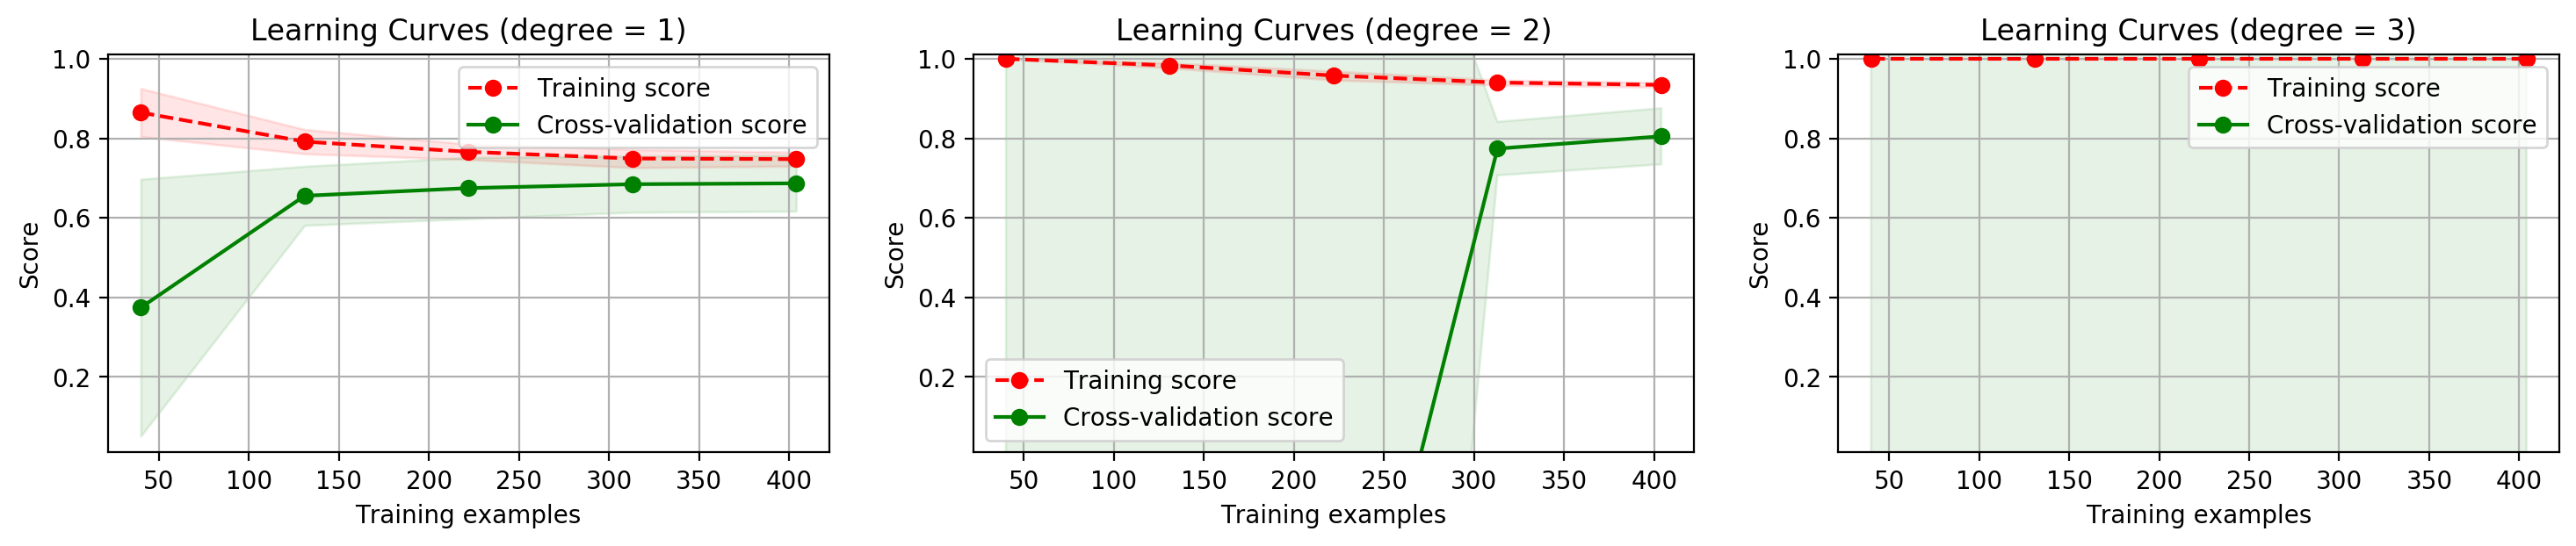

In [25]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
title = 'Learning Curves (degree = {})'
degrees = [1,2,3]
plt.figure(figsize = (18,3), dpi = 200)
for i in range(len(degrees)):
    plt.subplot(1,3,i+1)
    plot_learning_curve(plt, polynomial_model(degrees[i]), title.format(degrees[i]), X, y, ylim = (0.01,1.01), cv=cv)

## logistic

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

from sklearn.linear_model import LogisticRegression
import numpy as np
model = LogisticRegression()
model.fit(X_train,y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test,y_test)
print('train_score:{:.6f};test_score:{:.6f}'.format(train_score, test_score))
y_pred = model.predict(X_test)
print('matchs:{}/{}'.format(np.equal(y_pred,y_test).shape[0],y_test.shape[0]))

train_score:0.951648;test_score:0.929825
matchs:114/114


/home/weijunfei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [3]:
y_perd_proba = model.predict_proba(X_test)
print('sample of predict probabilty:{}'.format(y_perd_proba[0])) # 打印第一个样本数据
y_perd_proba_0 = y_perd_proba[:,0]>0.1
result = y_perd_proba[y_perd_proba_0]
y_perd_proba_1 = result[:,1] > 0.1
print(result[y_perd_proba_1])

sample of predict probabilty:[1.0000000e+00 6.0897523e-12]
[[0.19886985 0.80113015]
 [0.28148294 0.71851706]
 [0.83654727 0.16345273]
 [0.21724157 0.78275843]
 [0.8932944  0.1067056 ]
 [0.48888293 0.51111707]
 [0.11991986 0.88008014]
 [0.1346379  0.8653621 ]
 [0.19346132 0.80653868]
 [0.88070391 0.11929609]
 [0.7550836  0.2449164 ]
 [0.37527017 0.62472983]
 [0.14297289 0.85702711]]


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1,**kwarg):
    polynomial_features = PolynomialFeatures(degree = degree, include_bias = False)
    linear_regression = LogisticRegression(**kwarg)
    # 先增加多项式，再用线性回归算法拟合数据
    pipeline = Pipeline([('polinomial_features', polynomial_features),('logistic_regression', linear_regression)])
    return pipeline

In [5]:
import time
model = polynomial_model(degree=2,penalty = 'l1',solver='liblinear') # python 改版之后惩罚项若为l1，则必须加上 solver='liblinear'
start = time.time()
model.fit(X_train,y_train)
train_score = model.score(X_train, y_train)
cv_score = model.score(X_test,y_test)
print('elaspe:{0:.6f};train_score{1:0.6f};cv_score:{2:.6f}'.format(time.time()-start, train_score, cv_score))

elaspe:0.498353;train_score1.000000;cv_score:0.964912


In [6]:
logistic_regression = model.named_steps['logistic_regression']
print('model parametres shape:{};count of non-zero element:{}'.format(logistic_regression.coef_.shape,np.count_nonzero(logistic_regression.coef_)))

model parametres shape:(1, 495);count of non-zero element:87


/home/weijunfei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/home/weijunfei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app


elaspe: 0.230000


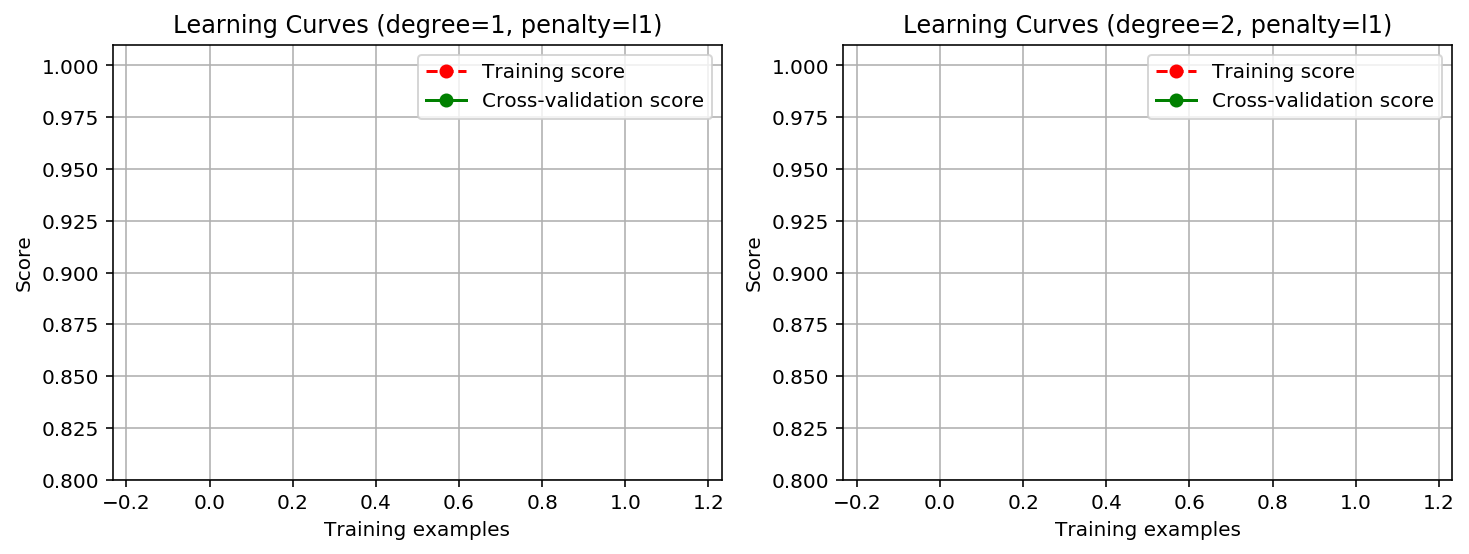

In [10]:
from sklearn.model_selection import ShuffleSplit
 
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty = 'l1'
 
start = time.clock()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty), 
                        title.format(degrees[i], penalty), X, y, ylim=(0.8, 1.01), cv=cv)
 
print('elaspe: {0:.6f}'.format(time.clock()-start))

In [ ]:
for i in range(len(degrees)):
    plt.subplot(1,len(degrees),i+1)
    plot_learning_curve(plt, polynomial_model(degrees[i],penalty = 'l2',max_iter=100, solver = 'lbfgs'), title.format(degrees[i]), X, y, ylim = (0.01,1.01), cv=cv)

/home/weijunfei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/weijunfei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
entropy_thresholds = np.linspace(0,1,15)
gini_thresholds = np.linspace(0,0.5,15)
param_grid = [{'criterion':['entropy'],'min_samples_split':entropy_thresholds},
             {'criterion':['gini'],'min_samples_split':gini_thresholds},
             {'max_depth':range(2,10)},
             {'min_samples_leaf':range(2,30,2)}]
clf = GridSearchCV(DecisionTreeClassifier(),param_grid, cv = 5)
clf.fit(X,y)
print('best param:{}; best score:{}'.format(clf.best_params_, clf.best_score_))

In [41]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

In [33]:

from sklearn import svm
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

#负责画出样本点
def plot_hyperplane(clf, X, y,
                    h=0.02,
                    draw_sv=True,
                    title='hyperplan'):

    #根据100个点坐标的范围生成一组网络数据
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
     
    # 给不同范围的点上色
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0],  X[y==label][:, 1],  c=colors[label], marker=markers[label])

    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

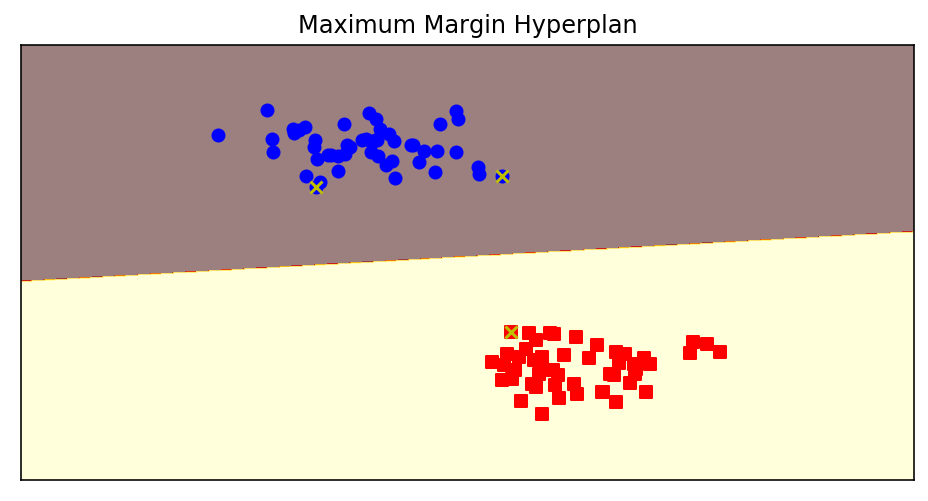

In [39]:
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X,y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.3)
clf = svm.SVC(C = 1.0, kernel = 'linear')
clf.fit(X,y)
plt.figure(figsize = (8,4), dpi = 144)
plot_hyperplane(clf, X,y, h =0.01, title = 'Maximum Margin Hyperplan')

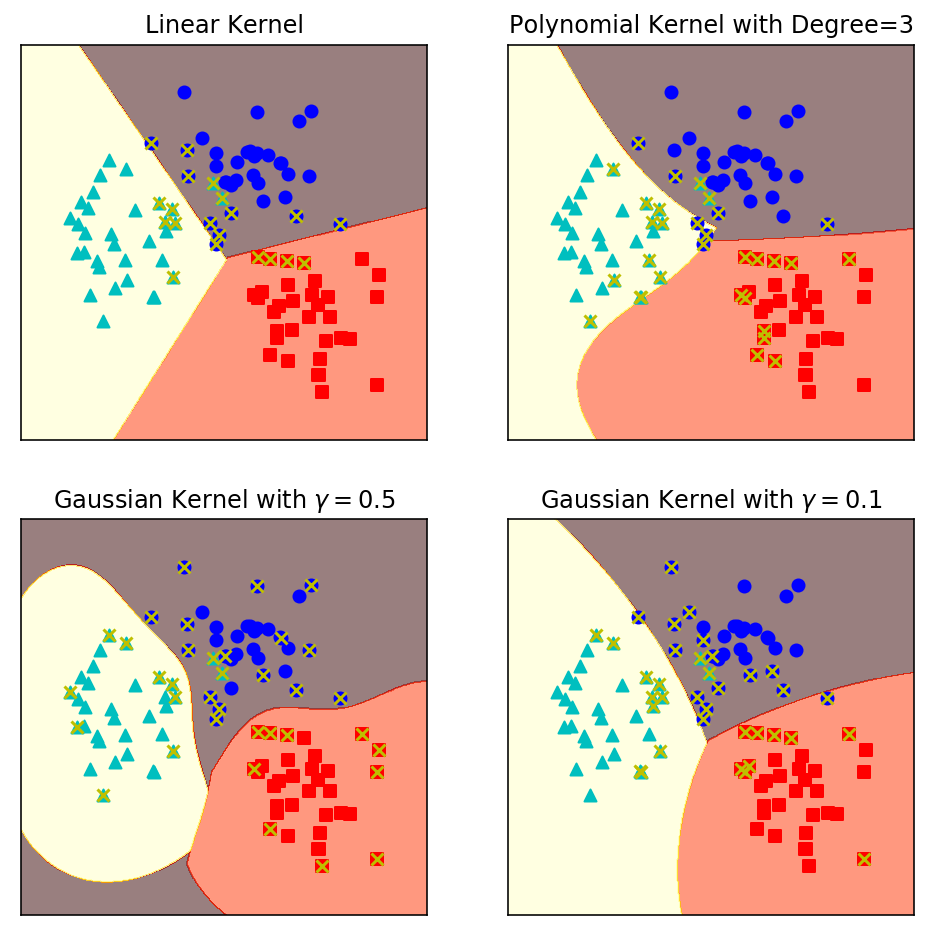

In [38]:
#在三个随机中心点周围生成100个随机点
X,Y = make_blobs(n_samples=100, centers=3,random_state=0, cluster_std=0.8)

#用不同的核函数计算结果。
#参数C表示对不符合最大间距规则样本的惩罚力度。
clf_linear = svm.SVC(C=1.0, kernel='linear')
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)

plt.figure(figsize=(8, 8), dpi=144)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
titles = ['Linear Kernel',  'Polynomial Kernel with Degree=3', 'Gaussian Kernel with $\gamma=0.5$', 'Gaussian Kernel with $\gamma=0.1$']

for clf, i in zip(clfs, range(len(clfs))):
   clf.fit(X,Y)
   plt.subplot(2, 2, i+1)
   plot_hyperplane(clf,X,Y, title=titles[i])

plt.show()

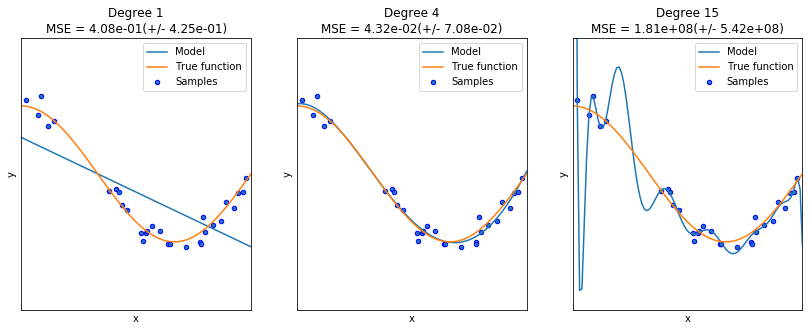

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # 使用交叉验证评估模型
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
 
def plot_learning_curve(estimator, title, X, y,ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
    							cv=cv, n_jobs=n_jobs, 
    							train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", 
    		label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", 
    		label="Cross-validation score")

    plt.legend(loc="best")
    return plt

digits = load_digits()
X, y = digits.data, digits.target

if __name__=='__main__':
	title = "Learning Curves (Naive Bayes)"
	# Cross validation with 100 iterations to get smoother mean test and train
	# score curves, each time with 20% data randomly selected as a validation set.
	cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
	estimator = GaussianNB()
	plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
	
	title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
	# SVC is more expensive so we do a lower number of CV iterations:
	cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
	estimator = SVC(gamma=0.001)
	plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)
	
	plt.show()
